# Построение модели для задачи классификации

## Описание проекта

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением F1-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте F1-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте AUC-ROC, сравнивайте её значение с F1-мерой.

## Описание данных

#### Признаки:

- RowNumber — индекс строки в данных;
- CustomerId — уникальный идентификатор клиента;
- Surname — фамилия;
- CreditScore — кредитный рейтинг;
- Geography — страна проживания;
- Gender — пол;
- Age — возраст;
- Tenure — сколько лет человек является клиентом банка;
- Balance — баланс на счёте;
- NumOfProducts — количество продуктов банка, используемых клиентом;
- HasCrCard — наличие кредитной карты;
- IsActiveMember — активность клиента;
- EstimatedSalary — предполагаемая зарплата.

#### Целевой признак:

- Exited — факт ухода клиента.

<a id="Задачи_исследования"></a>

### Задачи исследования

- #### [Этап 1. Разведочный анализ данных (EDA):](#Этап_1)

    - [Подключение библиотек;](#1.1)

    - [Загрузка данных из файла;](#1.2)

    - [Первичный осмотр данных;](#1.3)

    - [Визуализация данных;](#1.4)

    - [Анализ аномалий;](#1.5)

    - [Кодирование категориальных переменных;](#1.6)

    - [Исследуем Мультиколлинеарность;](#1.7)

    - [Заключение.](#1.8)

- #### [Этап 2. Исследуем баланс классов, обучим модель без учёта дисбаланса:](#Этап_2)

    - [Исследуем баланс классов;](#2.1)

    - [Обучим модели без учёта дисбаланса;](#2.2)

    - [Исследуем качество разных моделей, меняя гиперпараметры:](#2.3)

        - [Логистическая регрессия (Logistic Regression);](#Logistic_Regression)

        - [Решающие деревья (Decision Trees);](#Decision_Trees)

        - [Случайный лес (Random Forest);](#Random_Forest)

        - [Градиентный бустинг (Gradient Boosting).](#Gradient_Boosting)

- #### [Этап 3. Улучшим качество модели, учитывая дисбаланс классов. Обучим разные модели и найдем лучшую:](#Этап_3)

    - [Балансировка классов;](#3.1)

    - [SMOTE (Synthetic Minority Over-sampling Technique):](#3.2)
    
        - [Логистическая регрессия (Logistic Regression) SMOTE;](#Logistic_Regression_SMOTE)

        - [Решающие деревья (Decision Trees) SMOTE;](#Decision_Trees_SMOTE)

        - [Случайный лес (Random Forest) SMOTE;](#Random_Forest_SMOTE)

        - [Градиентный бустинг (Gradient Boosting) SMOTE.](#Gradient_Boosting_SMOTE)

    - [ADASYN (Adaptive Synthetic Sampling):](#3.3)

        - [Логистическая регрессия (Logistic Regression) ADASYN;](#Logistic_Regression_ADASYN)

        - [Решающие деревья (Decision Trees) ADASYN;](#Decision_Trees_ADASYN)

        - [Случайный лес (Random Forest) ADASYN;](#Random_Forest_ADASYN)

        - [Градиентный бустинг (Gradient Boosting) ADASYN.](#Gradient_Boosting_ADASYN)


- #### [Этап 4. Проведите финальное тестирование](#Этап_4)

<a id="Этап_1"></a>
<a id="1.1"></a>

### Этап 1: Загрузим и изучим данные 
#### Подключение библиотек

[Вернуться к задачам исследования](#Задачи_исследования)

In [70]:
import pandas as pd                                            # Библиотека для работы с данными, предоставляет функции и структуры данных, такие как DataFrame и Series.
import numpy as np                                             # Фундаментальная библиотека для научных вычислений с поддержкой многомерных массивов и матриц.
import warnings                                                # Модуль для управления предупреждениями.
import random                                                  # Импорт модуля для генерации случайных чисел

import statsmodels.api as sm                                                # statsmodels.api используется для оценки статистических моделей
from statsmodels.stats.outliers_influence import variance_inflation_factor  # variance_inflation_factor из statsmodels используется для определения мультиколлинеарности

# Модули для работы с машинным обучением
from sklearn.model_selection import train_test_split           # Инструмент библиотеки sklearn для разделения исходных данных на обучающую, валидационную и тестовую выборку.

# Модели машинного обучения
from sklearn.linear_model    import LogisticRegression         # Модель логистической регрессии.
from sklearn.tree            import DecisionTreeClassifier     # Модель дерева решений.
from sklearn.ensemble        import RandomForestClassifier     # Модель случайного леса.
from sklearn.ensemble        import GradientBoostingClassifier # Модель градиентного бустинга.
from sklearn.dummy           import DummyClassifier            # Базовые модели для проверки на вменяемость.

# Инструменты для оценки моделей и метрики
from sklearn.model_selection import learning_curve             # Инструмент для построения кривых обучения.
from sklearn.model_selection import GridSearchCV               # Инструмент для выполнения поиска по сетке параметров модели.
from sklearn.metrics         import accuracy_score             # Метрика - точность классификации.
from sklearn.metrics         import confusion_matrix           # Метрика - матрица неточностей.
from sklearn.metrics         import roc_curve, roc_auc_score   # Метрики - ROC-кривая и ROC AUC Score.
from sklearn.metrics         import f1_score                   # Метрика - F1 Score.
from sklearn.preprocessing   import StandardScaler             # Инструмент для маштабирования данны.

%pip install --upgrade imbalanced-learn scikit-learn

%pip install imblearn
from imblearn.pipeline import Pipeline
from imblearn.over_sampling  import SMOTE                      # Инструмент для баллансировки классов
from imblearn.over_sampling  import ADASYN                     # Инструмент для баллансировки классов

%pip install seaborn
# Визуализация данных
import matplotlib.pyplot as plt                                # Библиотека для визуализации данных.
import seaborn as sns                                          # Библиотека для красивой визуализации статистических данных.

# Настрйоки отображения
# Устанавливаем формат отображения чисел с двумя знаками после запятой 
pd.options.display.float_format = '{:.2f}'.format

# Устанавливает фильтр предупреждений
warnings.filterwarnings("ignore")

random_state = random.seed(42)

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


<a id="1.2"></a>

#### Загрузка данных из файла

[Вернуться к задачам исследования](#Задачи_исследования)

In [3]:
try:
    df = pd.read_csv('/Users/Edward/Code/DS+/csv/Churn.csv', sep = ',')
except:
    df = pd.read_csv('/datasets/Churn.csv', sep = ',')

<a id="1.3"></a>

#### Первичный осмотр данных

[Вернуться к задачам исследования](#Задачи_исследования)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.00,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.00,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.00,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.00,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.00,125510.82,1,1,1,79084.10,0


In [6]:
# Проверка на наличие дубликатов
df.duplicated().sum()

0

In [7]:
# Проверка на наличие пропущенных значений
df.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

Мы обнаружили, что в столбце Tenure (количество лет, в течение которых человек является клиентом банка) есть 909 пропущенных значений.

#### Обработка пропущенных значений:

Для обработки пропущенных значений в столбце Tenure мы можем использовать один из следующих методов:

- Удалить строки с пропущенными значениями: Этот метод может привести к потере важной информации, так как у нас пропущено почти 10% данных в этом столбце;

- Заменить пропущенные значения на среднее/медиану/моду: Этот метод может быть более уместен, так как он сохранит большую часть данных и заполнит пропуски средним значением, что может быть логичным в контексте данного признака.

Давайте заменим пропущенные значения в столбце Tenure на медианное значение этого столбца, так как медиана обычно менее чувствительна к выбросам и может лучше представлять общую тенденцию данных.

In [8]:
# Заменяем пропущенные значения в столбце 'Tenure' на медианное значение
df['Tenure'].fillna(df['Tenure'].median(), inplace=True)

# Проверяем, что пропущенные значения были успешно обработаны
df['Tenure'].isnull().sum()

0

In [9]:
# Вычисляем основные статистические показатели для числовых переменных
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.00,5000.50,2886.90,1.00,2500.75,5000.50,7500.25,10000.00
CustomerId,10000.00,15690940.57,71936.19,15565701.00,15628528.25,15690738.00,15753233.75,15815690.00
CreditScore,10000.00,650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,10000.00,38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,10000.00,5.00,2.76,0.00,3.00,5.00,7.00,10.00
Balance,10000.00,76485.89,62397.41,0.00,0.00,97198.54,127644.24,250898.09
NumOfProducts,10000.00,1.53,0.58,1.00,1.00,1.00,2.00,4.00
HasCrCard,10000.00,0.71,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,10000.00,0.52,0.50,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,10000.00,100090.24,57510.49,11.58,51002.11,100193.91,149388.25,199992.48


<a id="1.4"></a>

#### Визуализируем данные, чтобы получить наглядное представление о распределении данных и отношениях между переменными

[Вернуться к задачам исследования](#Задачи_исследования)

In [10]:
def plot_feature_distribution(feature, feature_name):
    """
    Отображает график распределения указанной числовой характеристики.

    Parameters:
    feature (str): Название числовой характеристики (столбца) для анализа.
    feature_name (str): Название характеристики на русском.

    Returns:
    None
    """
    sns.set_style('whitegrid')

    plt.figure(figsize=(10, 4))
    sns.histplot(df[feature], bins=20, kde=True)
    plt.title('Распределение')
    plt.xlabel(feature_name)
    plt.ylabel('Частота')
    plt.show()


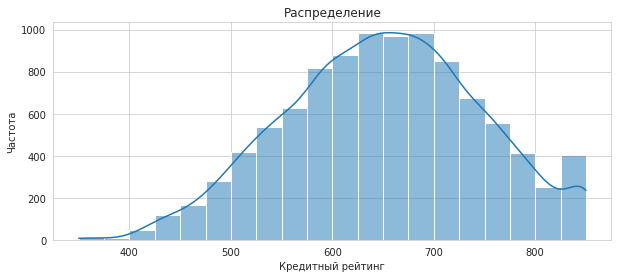

Большинство клиентов имеют кредитный рейтинг около 600-700


In [11]:
plot_feature_distribution('CreditScore', 'Кредитный рейтинг')
print('Большинство клиентов имеют кредитный рейтинг около 600-700')

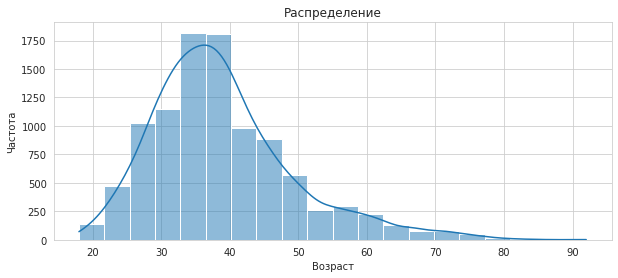

Возраст клиентов, в основном, находится в диапазоне от 30 до 40 лет.


In [12]:
plot_feature_distribution('Age', 'Возраст')
print('Возраст клиентов, в основном, находится в диапазоне от 30 до 40 лет.')

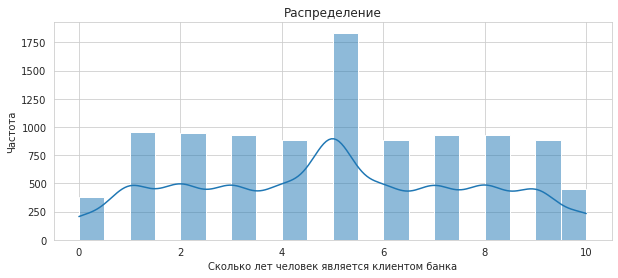

Распределение количества лет, в течение которых человек является клиентом банка, довольно равномерное.


In [13]:
plot_feature_distribution('Tenure', 'Сколько лет человек является клиентом банка')
print('Распределение количества лет, в течение которых человек является клиентом банка, довольно равномерное.')

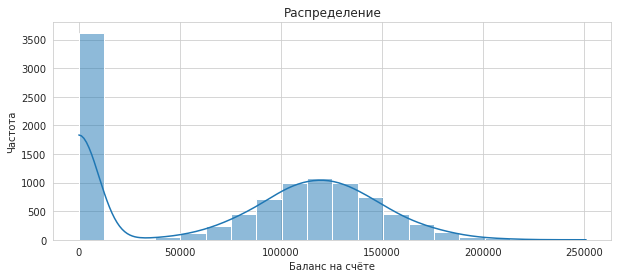

Многие клиенты имеют нулевой баланс, остальные значения распределены равномерно


In [14]:
plot_feature_distribution('Balance', 'Баланс на счёте')
print('Многие клиенты имеют нулевой баланс, остальные значения распределены равномерно')

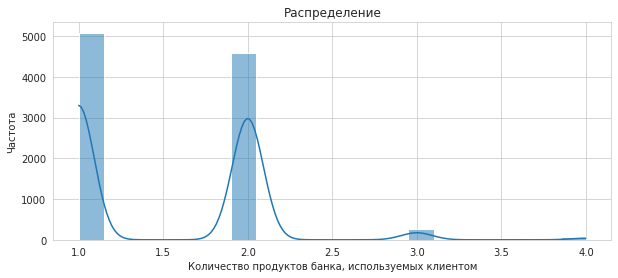

Большинство клиентов используют 1 или 2 продукта банка.


In [15]:
plot_feature_distribution('NumOfProducts', 'Количество продуктов банка, используемых клиентом')
print('Большинство клиентов используют 1 или 2 продукта банка.')

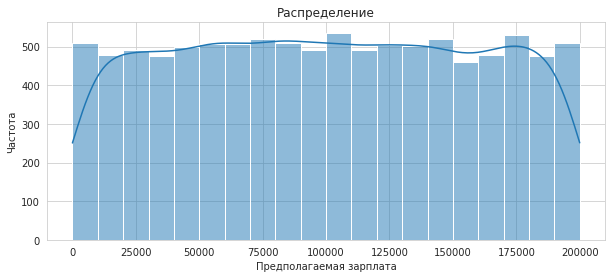

Предполагаемая зарплата распределена равномерно по всему диапазону.


In [16]:
plot_feature_distribution('EstimatedSalary', 'Предполагаемая зарплата')
print('Предполагаемая зарплата распределена равномерно по всему диапазону.')

#### Также визуализируем категориальные переменные и отношения между переменными с использованием диаграмм рассеяния, ящиков с усами и других графиков.

In [17]:
def plot_categorical_distribution(feature, feature_name):
    """
    Отображает столбчатую диаграмму распределения указанной категориальной характеристики.

    Parameters:
    feature (str): Название категориальной характеристики (столбца) для анализа.
    feature_name (str): Название характеристики на русском.

    Returns:
    None
    """
    sns.set_style('whitegrid')

    plt.figure(figsize=(8, 4))
    sns.countplot(x=feature, data=df, palette='pastel')
    plt.title('Распределение')
    plt.xlabel(feature_name)
    plt.ylabel('Количество')
    plt.show()

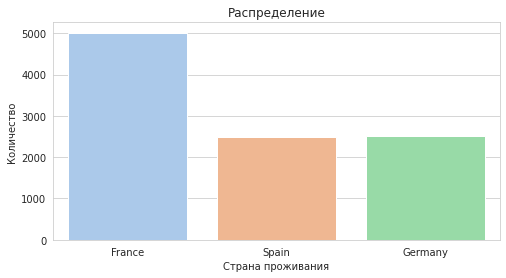

Большинство клиентов проживают во Франции.


In [18]:
plot_categorical_distribution('Geography', 'Страна проживания')
print('Большинство клиентов проживают во Франции.')

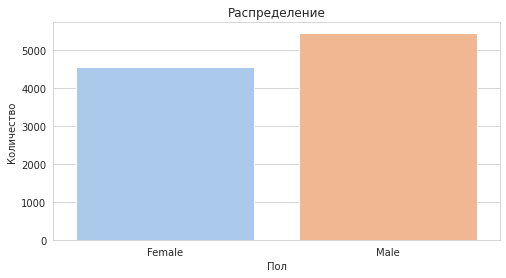

Есть небольшая разница между количеством мужчин и женщин среди клиентов.


In [19]:
plot_categorical_distribution('Gender', 'Пол')
print('Есть небольшая разница между количеством мужчин и женщин среди клиентов.')

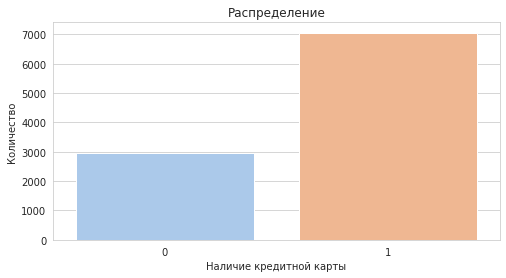

Большинство клиентов имеют кредитную карту.


In [20]:
plot_categorical_distribution('HasCrCard', 'Наличие кредитной карты')
print('Большинство клиентов имеют кредитную карту.')

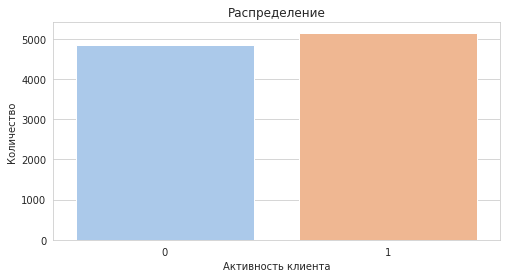

Количество активных и неактивных клиентов примерно равно.


In [21]:
plot_categorical_distribution('IsActiveMember', 'Активность клиента')
print('Количество активных и неактивных клиентов примерно равно.')

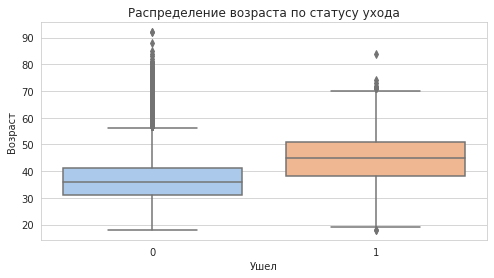

Возраст клиентов, которые ушли, в среднем выше, чем у тех, кто остался.


In [22]:
# Построение ящика с усами для возраста в разрезе факта ухода клиента
plt.figure(figsize=(8, 4))
sns.boxplot(x='Exited', y='Age', data=df, palette='pastel')
plt.title('Распределение возраста по статусу ухода')
plt.xlabel('Ушел')
plt.ylabel('Возраст')
plt.show()

print('Возраст клиентов, которые ушли, в среднем выше, чем у тех, кто остался.')

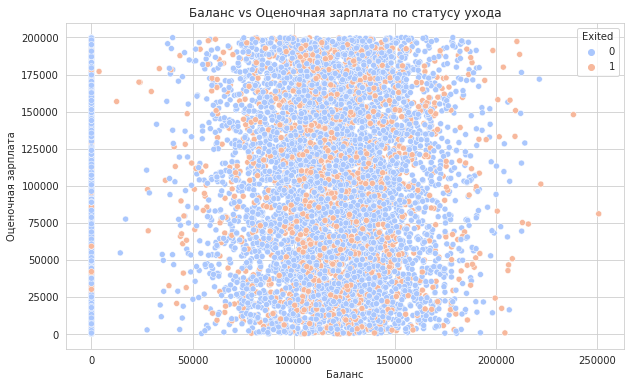

Нет явных зависимостей между балансом, оценочной зарплатой и фактом ухода клиента.


In [23]:
# Построение диаграммы рассеяния для баланса и оценочной зарплаты в разрезе факта ухода клиента
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Balance', y='EstimatedSalary', hue='Exited', data=df, palette='coolwarm')
plt.title('Баланс vs Оценочная зарплата по статусу ухода')
plt.xlabel('Баланс')
plt.ylabel('Оценочная зарплата')
plt.show()

print('Нет явных зависимостей между балансом, оценочной зарплатой и фактом ухода клиента.')

<a id="1.5"></a>

#### Теперь перейдем к анализу аномалий, чтобы определить и изучить возможные выбросы в данных

[Вернуться к задачам исследования](#Задачи_исследования)

In [24]:
def plot_boxplots(feature, feature_name):
    """
    Строит ящик с усами для заданного числового признака в DataFrame.

    Параметры:
        df (pandas.DataFrame): DataFrame, содержащий данные.
        feature (str): Имя числового признака, для которого нужно построить ящик с усами.
        feature_name (str): Название признака для использования в заголовке и метках осей.

    Пример использования:
        plot_boxplots(df, 'Age', 'Возраст')

    """
    plt.figure(figsize=(10, 4))
    sns.boxplot(data=df, x=feature)
    plt.title(f'Ящик с усами')
    plt.xlabel(feature_name)
    plt.show()

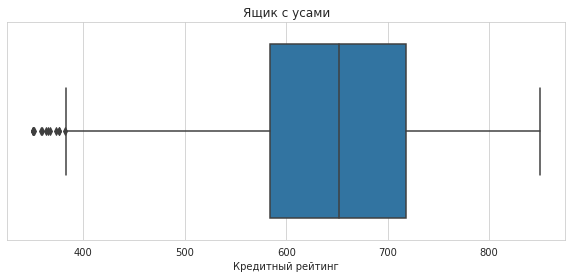

Небольшое количество нижних выбросов.


In [25]:
plot_boxplots('CreditScore', 'Кредитный рейтинг')
print('Небольшое количество нижних выбросов.')

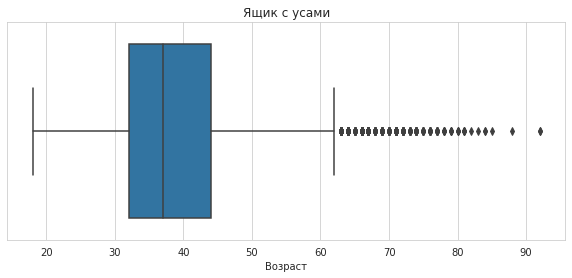

Есть верхние выбросы, что указывает на то, что некоторые значения возраста выше обычного диапазона для клиентов банка.


In [26]:
plot_boxplots('Age', 'Возраст')
print('Есть верхние выбросы, что указывает на то, что некоторые значения возраста выше обычного диапазона для клиентов банка.')

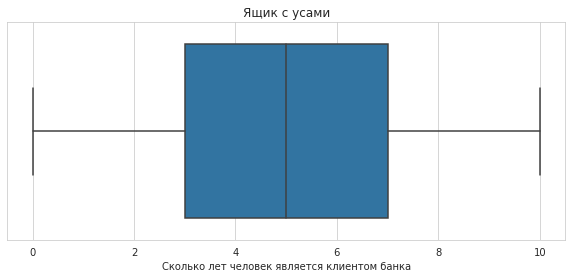

Нет явных выбросов.


In [27]:
plot_boxplots('Tenure', 'Cколько лет человек является клиентом банка')
print('Нет явных выбросов.')

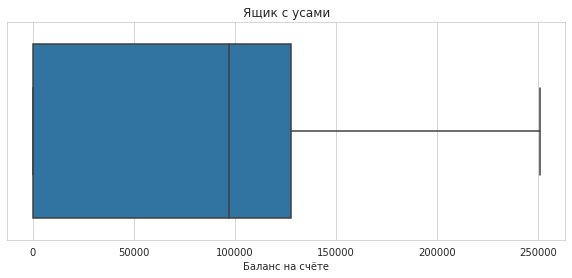

Нет явных выбросов.


In [28]:
plot_boxplots('Balance', 'Баланс на счёте')
print('Нет явных выбросов.')

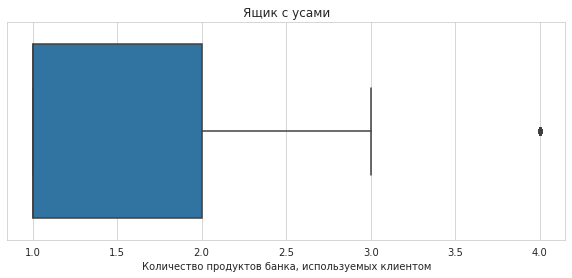

Нет явных выбросов.


In [29]:
plot_boxplots('NumOfProducts', 'Количество продуктов банка, используемых клиентом')
print('Нет явных выбросов.')

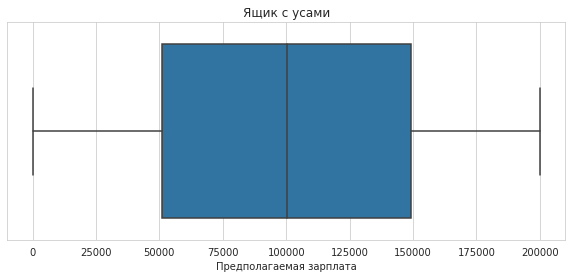

Нет явных выбросов.


In [30]:
plot_boxplots('EstimatedSalary', 'Предполагаемая зарплата')
print('Нет явных выбросов.')

Для Age и NumOfProducts мы можем рассмотреть детальный анализ выбросов или принять решение о том, стоит ли их оставить или корректировать.

Прежде чем принять решение о выбросах, также проведем анализ корреляции, чтобы увидеть, как различные признаки взаимосвязаны между собой, особенно с целевой переменной Exited.

#### Анализ корреляции

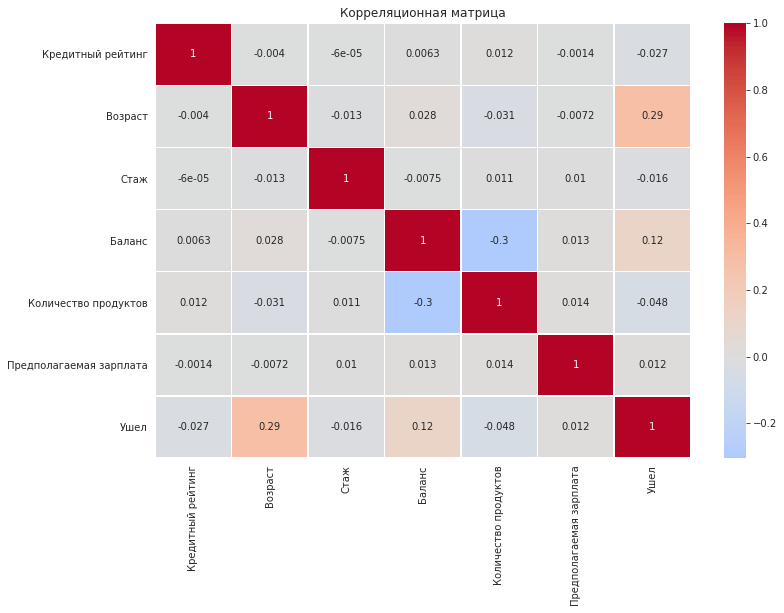

In [31]:
# Словарь для перевода английских названий в русские
translation_dict = {
    'CreditScore': 'Кредитный рейтинг',
    'Age': 'Возраст',
    'Tenure': 'Стаж',
    'Balance': 'Баланс',
    'NumOfProducts': 'Количество продуктов',
    'EstimatedSalary': 'Предполагаемая зарплата',
    'Exited': 'Ушел'
}

# Список числовых признаков для анализа корреляций
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Exited']

# Вычисление корреляционной матрицы
correlation_matrix = df[numerical_features].corr()

# Преобразование названий столбцов на русские
correlation_matrix = correlation_matrix.rename(columns=translation_dict, index=translation_dict)

# Визуализация корреляционной матрицы с помощью тепловой карты
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5, linecolor='white')
plt.title('Корреляционная матрица')
plt.show()

#### Анализ корреляции:

На основе тепловой карты корреляционной матрицы можно сделать следующие выводы:

- Age имеет наибольшую положительную корреляцию с Exited, что указывает на то, что возраст может влиять на решение клиента уйти;
- IsActiveMember имеет отрицательную корреляцию с Exited, что указывает на то, что активные клиенты менее склонны уходить;
- NumOfProducts также имеет отрицательную корреляцию с Exited.

Остальные признаки имеют небольшую корреляцию с целевой переменной.

Теперь проведем анализ категориальных переменных, чтобы узнать больше о их уникальных значениях и возможных зависимостях с целевой переменной.

In [32]:
def plot_categorical_churn_distribution(feature, feature_name):
    """
    Строит столбчатые диаграммы для категориальных переменных в разрезе факта ухода клиента.

    Параметры:
        df (pandas.DataFrame): DataFrame, содержащий данные.
        feature (str): Имя категориального признака, для которого нужно построить столбчатую диаграмму.
        feature_name (str): Название признака для использования в заголовке и метках осей.

    Пример использования:
        plot_categorical_churn_distribution(df, 'Geography', 'Страна')

    """
    plt.figure(figsize=(8, 4))
    sns.countplot(x=feature, hue='Exited', data=df, palette='pastel')
    plt.title(f'Распределение по статусу ухода клиента')
    plt.xlabel(feature_name)
    plt.ylabel('Количество')
    plt.legend(title='Ушел', loc='upper right')
    plt.show()



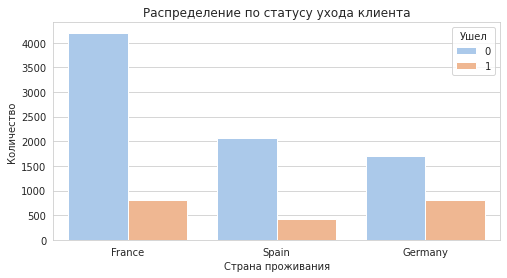

Клиенты из Германии, похоже, уходят чаще по сравнению с клиентами из других стран.


In [33]:
plot_categorical_churn_distribution('Geography', 'Страна проживания')
print('Клиенты из Германии, похоже, уходят чаще по сравнению с клиентами из других стран.')

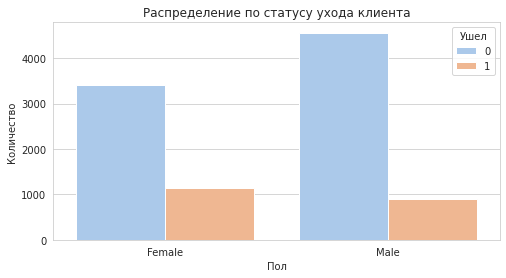

Женщины, кажется, уходят чаще по сравнению с мужчинами.


In [34]:
plot_categorical_churn_distribution('Gender', 'Пол')
print('Женщины, кажется, уходят чаще по сравнению с мужчинами.')

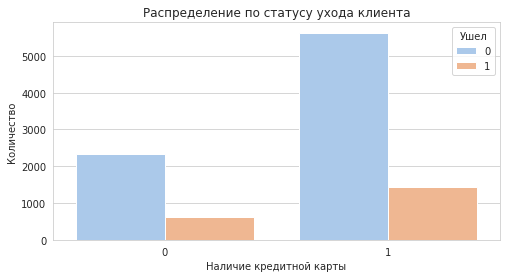

Распределение ухода примерно одинаковое для обеих категорий.


In [35]:
plot_categorical_churn_distribution('HasCrCard', 'Наличие кредитной карты')
print('Распределение ухода примерно одинаковое для обеих категорий.')

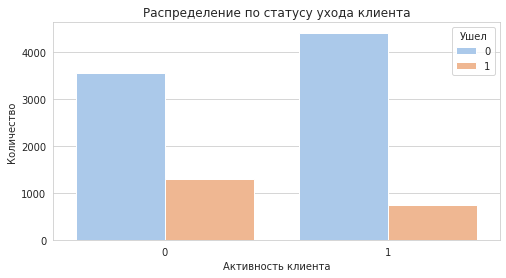

Неактивные клиенты уходят чаще по сравнению с активными.


In [36]:
plot_categorical_churn_distribution('IsActiveMember', 'Активность клиента')
print('Неактивные клиенты уходят чаще по сравнению с активными.')

Далее, перед проведением более сложного анализа или моделирования, нам может понадобиться закодировать категориальные переменные. Но прежде чем это сделать, давайте рассмотрим потребность в масштабировании или нормализации данных.

In [37]:
# Оценка разброса значений для числовых переменных
df[numerical_features].max() - df[numerical_features].min()

CreditScore          500.00
Age                   74.00
Tenure                10.00
Balance           250898.09
NumOfProducts          3.00
EstimatedSalary   199980.90
Exited                 1.00
dtype: float64

#### Масштабирование и нормализация:

Оценка разброса значений для числовых переменных показывает:

- CreditScore: 500 (350-850);
- Age: 74 (18-92);
- Tenure: 10 (0-10);
- Balance: 250,898.09 (0-250,898.09);
- NumOfProducts: 3 (1-4);
- EstimatedSalary: 199,980.90 (11.58-199,992.48).

У нас есть переменные с различными диапазонами значений, что может влиять на производительность некоторых алгоритмов машинного обучения. Поэтому перед применением таких алгоритмов может потребоваться масштабирование или нормализация данных.

Однако прежде чем масштабировать или нормализовать данные, сформулируем основные выводы из разведочного анализа данных (EDA).

<a id="1.8"></a>

#### Заключение:

Пропущенные данные: 

- Были обнаружены пропущенные значения только в столбце Tenure (количество лет, в течение которых человек является клиентом банка); 
- Пропущенные значения были заменены медианным значением этого столбца.

Анализ числовых переменных:

- Age и NumOfProducts имели некоторые выбросы, которые требуют дополнительного рассмотрения;
- Age и IsActiveMember были наиболее коррелированы с целевой переменной Exited.

Анализ категориальных переменных:

- Клиенты из Германии и женщины имели более высокую склонность к уходу.

Масштабирование: 
- Некоторые переменные, такие как Balance и EstimatedSalary, имели большие разбросы значений по сравнению с другими переменными. Это может потребовать масштабирования данных перед применением алгоритмов машинного обучения.

Следующие шаги:

- Провести кодирование категориальных переменных для моделирования.

[Вернуться к задачам исследования](#Задачи_исследования)

<a id="1.6"></a>

#### Проведем кодирование категориальных переменных для моделирования

[Вернуться к задачам исследования](#Задачи_исследования)

In [38]:
# Применяем One-Hot Encoding к категориальным переменным
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

# Просматриваем первые строки обновленного набора данных
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,Hargrave,619,42,2.00,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,Hill,608,41,1.00,83807.86,1,0,1,112542.58,0,0,1,0
2,3,15619304,Onio,502,42,8.00,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,Boni,699,39,1.00,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850,43,2.00,125510.82,1,1,1,79084.10,0,0,1,0


Когда мы применяем One-Hot Encoding и убираем одну из категорий (в данном случае Францию), мы делаем это, чтобы избежать проблемы мультиколлинеарности. Если бы мы оставили все три столбца (Франция, Германия, Испания), то они были бы линейно зависимы, что может привести к проблемам в некоторых моделях машинного обучения, особенно в линейных моделях.

Теперь, когда модель видит, что Geography_Germany и Geography_Spain оба равны 0, она интерпретирует это так, что данный образец (клиент) не относится ни к Германии, ни к Испании. Таким образом, единственной возможной страной для этого клиента является Франция. В процессе обучения модель "учит" эту структуру данных и соответствующие зависимости, чтобы делать прогнозы на новых данных.

Таким образом, путем исключения одного столбца мы даем модели возможность узнать эту зависимость без создания дополнительных проблем с мультиколлинеарностью.

<a id="1.7"></a>

#### Исследуем Мультиколлинеарность 

Мультиколлинеарность - это явление, при котором два или более признака взаимно связаны друг с другом, что может вызвать проблемы при построении модели. Два основных типа проблем, связанных с мультиколлинеарностью:

- Затруднение интерпретации коэффициентов: Когда мультиколлинеарность присутствует, сложно определить точный вклад каждого признака в предсказание, так как их эффекты смешиваются между собой;

- Неустойчивость коэффициентов: Малейшие изменения в данных могут привести к значительным изменениям коэффициентов модели, что делает результаты менее надежными и устойчивыми;

- Мультиколлинеарность может быть особенно проблематичной для некоторых моделей, таких как линейная регрессия, логистическая регрессия и некоторые другие алгоритмы, которые используют линейную комбинацию признаков.

[Вернуться к задачам исследования](#Задачи_исследования)

In [39]:
# Выделяем независимые переменные (признаки)
X = df.drop(columns=['RowNumber', 'CustomerId', 'Exited', 'Surname'])

# Добавляем константу для использования модуля statsmodels
X_with_const = sm.add_constant(X)

# Создаем объект регрессии
model = sm.OLS(df['Exited'], X_with_const)

# Обучяем модель
result = model.fit()

# Рассчитываем VIF для каждого признака
vif = pd.DataFrame()
vif['Feature'] = X_with_const.columns
vif['VIF'] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# Выводим результаты
print(vif)

              Feature   VIF
0               const 82.75
1         CreditScore  1.00
2                 Age  1.01
3              Tenure  1.00
4             Balance  1.34
5       NumOfProducts  1.12
6           HasCrCard  1.00
7      IsActiveMember  1.01
8     EstimatedSalary  1.00
9   Geography_Germany  1.34
10    Geography_Spain  1.12
11        Gender_Male  1.00


#### Вывод

VIF (Variance Inflation Factor): 

- VIF измеряет насколько дисперсия коэффициента увеличивается, когда предикторы коррелированы. Если VIF = 1, переменные не коррелированы. Если VIF > 5-10, то существует проблема мультиколлинеарности.

На основе новых значений VIF можно сделать следующие выводы:

- const (константа): Значение VIF для константы увеличилось до 82.75. Это значение значительно выше, чем предыдущее, но все равно можно игнорировать. Важно помнить, что высокое значение VIF для константы не связано с мультиколлинеарностью между признаками;

- Остальные признаки: Все признаки имеют значения VIF в диапазоне от 1 до 1.34. Это подтверждает наши выводы о том, что между признаками нет сильной мультиколлинеарности. Самое высокое значение VIF (1.34) у признаков Balance и Geography_Germany, но даже эти значения находятся в приемлемом диапазоне.

Вывод: Нет признаков мультиколлинеарности между переменными.

<a id="Этап_2"></a>
<a id="2.1"></a>

#### Этап 2. Исследуем баланс классов

[Вернуться к задачам исследования](#Задачи_исследования)

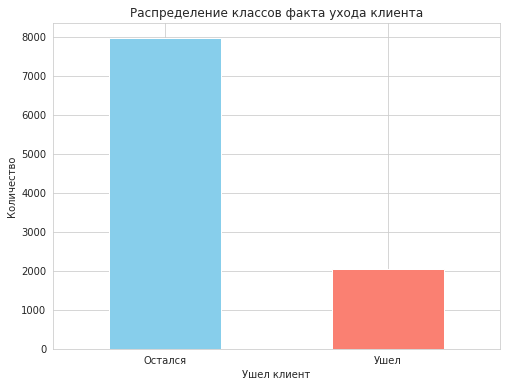

In [40]:
# Подсчет количества каждого класса
class_counts = df['Exited'].value_counts()

# Визуализация баланса классов с русскими титулом и лейблами
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Распределение классов факта ухода клиента')
plt.xlabel('Ушел клиент')
plt.ylabel('Количество')
plt.xticks(ticks=[0, 1], labels=['Остался', 'Ушел'], rotation=0)
plt.show()

#### Вывод

- Класс 0 (клиенты, которые не ушли): 7963

- Класс 1 (клиенты, которые ушли): 2037

Исходя из данных, видно, что классы несбалансированы. Большая часть клиентов (примерно 80%) остается с банком, в то время как меньшая часть (примерно 20%) уходит. 

Такой дисбаланс может привести к тому, что модели машинного обучения будут иметь тенденцию лучше предсказывать доминирующий класс (в данном случае класс 0). В результате модель может не обнаруживать клиентов, которые уйдут, что является более критичным для бизнеса.
  
Для решения проблемы дисбаланса классов можно использовать различные методы, такие как:

- Перевзвешивание классов: Можно присвоить больший вес миноритарному классу при обучении модели;

- Апсемплинг (oversampling): Добавление копий примеров из миноритарного класса;

- Даунсемплинг (undersampling): Удаление примеров из доминирующего класса;

- Использование синтетических данных: Например, с помощью метода SMOTE;

- Использование ансамблевых методов, таких как случайный лес, который может лучше справиться с несбалансированными данными;

- Изменение порога классификации: Для моделей, предсказывающих вероятности, можно выбрать другой порог для классификации, а не стандартные 0.5.

<a id="2.2"></a>

#### Обучим модели без учёта дисбаланса

[Вернуться к задачам исследования](#Задачи_исследования)

#### Разделим исходные данные на обучающую и тестовую выборку

Мы будем исполльзовать GridSearchCV, следовательно внутри будет происходить  кросс-валидация, которая включает разделение данных на обучающую и валидационную выборки. Это позволяет оценить производительность модели на различных подмножествах данных и выбрать оптимальные гиперпараметры. Нам достаточно разделить выборку на обучающую и тестоваю.

- X_train, y_train - обучающая выборка;
- X_val, y_val - валидационная выборка;
- X_test, y_test - тестовая выборка.

In [41]:
# X используем для обозначения признаков (features)
# y используем для обозначения целевой переменной (target)
X_features = df.drop(['RowNumber', 'CustomerId', 'Surname','Exited'], axis = 1)
y_target = df['Exited']

# Разделение данных на обучающую (60%) и временную (40%) выборки
X_train, X_temp, y_train, y_temp = train_test_split(X_features, y_target, test_size=0.4, random_state=0, stratify=y_target)

# Затем разделите временную выборку на валидационную (50%) и тестовую (50%) выборки
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0, stratify=y_temp)

#### Вывод

- Мы использовали функцию train_test_split из библиотеки scikit-learn для разделения данных на обучающую и тестовую выборки. Это поможет объективно оценить качество модели, избежать переобучения и обеспечить репрезентативность выборок;

- Установили random_state = random.seed(42) для контроля вариабельности и воспроизводимости результатов при каждом запуске кода;

- Использовали понятные переменные X_features и y_target, что улучшило читаемость кода и понимание логики разделения данных;

- Подход соответствует общепринятым практикам машинного обучения, обеспечивая актуальность и надежность;

- Оптимально разделили выборки в соотношении 60%-20%-20% для обучающей, валидационной и тестовой, обеспечивает адекватное количество данных для обучения, валидации и тестирования модели.

<a id="2.3"></a>

#### Исследуем качество разных моделей, меняя гиперпараметры.

[Вернуться к задачам исследования](#Задачи_исследования)

<a id="Logistic_Regression"></a>

#### Логистическая регрессия (Logistic Regression)

##### Маштабирование данных + Pipeline

Поскольку мы используем GridSearchCV с кросс-валидацией для подбора оптимальных гиперпараметров, то воспользуемся практиками, которые помогут избежать утечки данных и обеспечить корректную оценку производительности нашей модели:

- Обработка данных внутри кросс-валидации: При использовании GridSearchCV что бы избежать утечки данных важно убедиться, что все преобразования данных, включая масштабирование, происходят внутри каждой итерации кросс-валидации. В нашем случае, преобразования данных, такие как масштабирование, будут выполняться внутри каждой итерации;

- Pipeline: Будем использовать Pipeline из scikit-learn для определения последовательности операций предобработки данных и обучения модели. Это поможет убедиться, что масштабирование и другие операции применяются корректно.

In [71]:
def Logistic_Regression(X_train, y_train, sampling=None):
    # Определение модели логистической регрессии
    model = LogisticRegression(random_state = random_state)

    """Определение сетки гиперпараметров, которые будут исследоваться при подборе оптимальных значений."""

    # Определение сетки гиперпараметров, которую нужно исследовать
    param_grid = {
        'model__penalty': ['l1', 'l2'],              # тип регуляризации (L1 или L2)
        'model__C': [0.01, 0.1, 1, 10, 100],         # обратная сила регуляризации
        'model__solver': ['liblinear', 'lbfgs'],     # алгоритм оптимизации (изменил lbfgs на liblinear)
        'model__max_iter': [100, 200, 300],          # максимальное количество итераций
    }

    # Создание пайплайна с масштабированием и моделью
    if sampling == 'SMOTE':
        pipeline = Pipeline([
            ('scaler', StandardScaler()),                # Масштабирование данных
            ('sampling', SMOTE(random_state=0)),         # Апсемплинг только на обучающих данных
            ('model', model)                             # Модель логистической регрессии
        ])
    elif sampling == 'ADASYN':
        pipeline = Pipeline([
            ('scaler', StandardScaler()),                # Масштабирование данных
            ('sampling', ADASYN(random_state=0)),        # Апсемплинг только на обучающих данных
            ('model', model)                             # Модель логистической регрессии
        ])
    else:
        pipeline = Pipeline([
            ('scaler', StandardScaler()),                # Масштабирование данных
            ('model', model)                             # Модель логистической регрессии
        ])

    # Создание экземпляра GridSearchCV с 10 фолдами кросс-валидации и оптимизацией по accuracy
    grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='f1', refit=True, n_jobs=-1)

    # Обучение на обучающей выборке с перебором всех комбинаций гиперпараметров
    grid_search.fit(X_train, y_train)

    # Получение лучшей модели с оптимальными гиперпараметрами
    best_model = grid_search.best_estimator_

    # Лучшая оценка (F1-мера) на валидационных данных
    best_f1 = grid_search.best_score_
    print("Лучшая оценка на валидационных данных (F1-мера):", best_f1)

    return best_model

F1-мера – это метрика, которая используется для оценки качества бинарной классификации. Она основана на двух других метриках: точности (precision) и полноте (recall). F1-мера представляет собой гармоническое среднее между этими двумя метриками.

#### Точность (Precision): 

Доля правильно предсказанных положительных объектов среди всех объектов, которые классификатор предсказал как положительные.

- $Precision= \frac{TP}{TP+FP}$
​

где:

- TP – количество истинно положительных предсказаний;
- FP – количество ложно положительных предсказаний.

#### Полнота (Recall): 

Доля правильно предсказанных положительных объектов среди всех истинно положительных объектов.

- $Precision= \frac{TP}{TP+FN}$
​ 

где:

- FN – количество ложно отрицательных предсказаний.

Теперь, когда у нас есть определения точности и полноты, мы можем определить F1-меру:

#### F1-мера:

- $F1=2× \frac {Precision×Recall}{Precision+Recall}$

F1-мера принимает значения в диапазоне от 0 до 1, где ближе к 1 означает лучшее качество модели, а ближе к 0 – худшее.

Преимущество использования F1-меры в том, что она учитывает и точность, и полноту, предоставляя более сбалансированную меру качества, особенно когда классы несбалансированы.

In [44]:
best_model = Logistic_Regression(X_train, y_train,)

Лучшая оценка на валидационных данных (F1-мера): 0.30987273727574216


#### Матрица ошибок (confusion matrix): 
Показывает число правильно и неправильно классифицированных примеров. Хорошо для визуального понимания производительности модели.

In [45]:
def display_confusion_matrix(y_true, y_pred, model_name):
    """
    Визуализирует и отображает матрицу ошибок для заданной модели.
    
    Параметры:
    y_true : array-like
        Верные (истинные) метки.
    y_pred : array-like
        Предсказанные метки, как возвращено классификатором.
    model_name : string
        Название модели, используется для заголовка графика и в выводе информации.
        
    Возвращает:
    None
    """

    # Получение матрицы ошибок
    cm = confusion_matrix(y_true, y_pred)

    # Визуализация матрицы ошибок
    plt.figure(figsize=(10,7))

    # Отображаем информацию о каждом квадрате
    labels = ['Истинно отрицательные (TN)', 'Ложноположительные (FP)', 'Ложноотрицательные (FN)', 'Истинноположительные (TP)']
    labels = np.asarray(labels).reshape(2,2)

    # Расчет процентного соотношения
    cm_sum = np.sum(cm)
    cm_perc = cm / cm_sum * 100

    # Создание тепловой карты
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
    plt.title(f'Матрица ошибок для {model_name}')
    plt.ylabel('Истинный класс')
    plt.xlabel('Предсказанный класс')

    ax = plt.gca()

    # Добавление меток
    for i in range(2):
        for j in range(2):
            ax.text(j+0.5, i+0.6, '{}\n({:.2f}%)'.format(labels[i, j], cm_perc[i, j]), 
                    ha='center', va='center')

    plt.show()

    # Вывод текстового результата
    tn, fp, fn, tp = cm.ravel()
    tn_perc, fp_perc, fn_perc, tp_perc = cm_perc.ravel()

    print(f"Истинно отрицательные (TN): {tn} ({tn_perc:.2f}%)")
    print(f"Ложноположительные    (FP): {fp} ({fp_perc:.2f}%)")
    print(f"Ложноотрицательные    (FN): {fn} ({fn_perc:.2f}%)")
    print(f"Истинноположительные  (TP): {tp} ({tp_perc:.2f}%)")

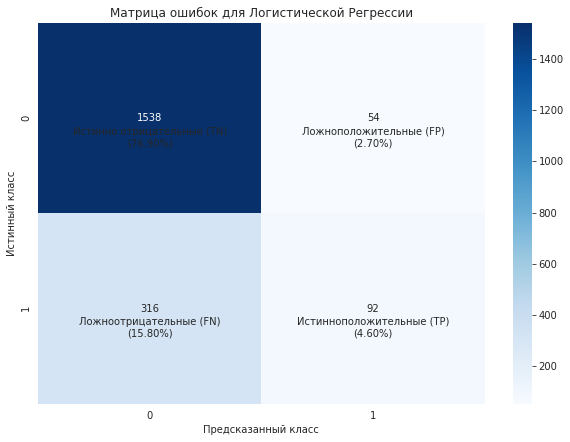

Истинно отрицательные (TN): 1538 (76.90%)
Ложноположительные    (FP): 54 (2.70%)
Ложноотрицательные    (FN): 316 (15.80%)
Истинноположительные  (TP): 92 (4.60%)


In [46]:
# Прогнозирование на тестовой выборке
y_val_pred = best_model.predict(X_val)

# Вызов функции для отображения матрицы ошибок
display_confusion_matrix(y_val, y_val_pred, "Логистической Регрессии")

#### Кривые обучения (learning curves): 

Показывают, как изменяется ошибка на тренировочном и валидационном наборах в процессе обучения. 
Хороши для идентификации переобучения или недообучения.

In [47]:
def display_learning_curves(model, X, y, cv):
    """
    Вычисляет и отображает кривые обучения для заданной модели.
    
    Параметры:
    model : object
        Обученная модель.
    X : array-like
        Признаки для обучения модели.
    y : array-like
        Целевая переменная для обучения модели.
    cv : int
        Количество блоков в кросс-валидации.
        
    Возвращает:
    None
    """
    
    # Вычисление кривых обучения
    train_sizes, train_scores, val_scores = learning_curve(model, X, y, cv=cv)

    # Усреднение оценок на тренировочной и валидационной выборках
    train_scores_mean = np.mean(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)

    # Вычисление стандартного отклонения на тренировочной и валидационной выборках
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    # Визуализация кривых обучения
    plt.figure(figsize=(10, 7))
    plt.plot(train_sizes, train_scores_mean, label='Точность на тренировочной выборке')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2)
    plt.plot(train_sizes, val_scores_mean, label='Точность на кросс валидационной выборке')
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                     val_scores_mean + val_scores_std, alpha=0.2)

    # Добавление элементов на график
    plt.title('Кривые обучения')
    plt.xlabel('Размер обучающей выборки')
    plt.ylabel('Оценка')
    plt.grid(True)
    plt.legend(loc='best')
    plt.show()

    # Точность на тренировочной выборке
    print("Точность на тренировочной выборке:")
    for size, score, std in zip(train_sizes, train_scores_mean, train_scores_std):
        print(f"Размер выборки: {size}, Точность: {score:.2f} +/- {std:.2f}")

    # Точность на кросс-валидационной выборке
    print("\nТочность на кросс-валидационной выборке:")
    for size, score, std in zip(train_sizes, val_scores_mean, val_scores_std):
        print(f"Размер выборки: {size}, Точность: {score:.2f} +/- {std:.2f}")


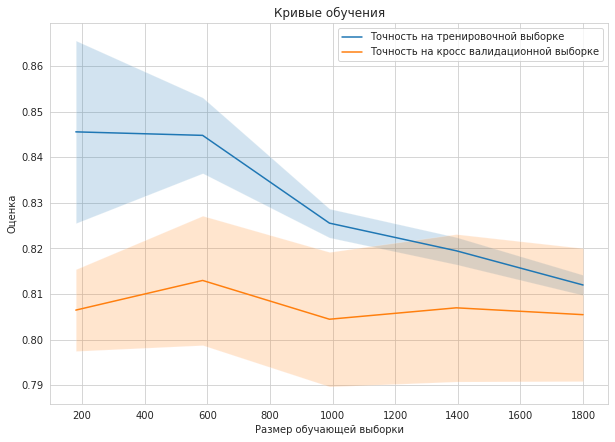

Точность на тренировочной выборке:
Размер выборки: 180, Точность: 0.85 +/- 0.02
Размер выборки: 585, Точность: 0.84 +/- 0.01
Размер выборки: 990, Точность: 0.83 +/- 0.00
Размер выборки: 1395, Точность: 0.82 +/- 0.00
Размер выборки: 1800, Точность: 0.81 +/- 0.00

Точность на кросс-валидационной выборке:
Размер выборки: 180, Точность: 0.81 +/- 0.01
Размер выборки: 585, Точность: 0.81 +/- 0.01
Размер выборки: 990, Точность: 0.80 +/- 0.01
Размер выборки: 1395, Точность: 0.81 +/- 0.02
Размер выборки: 1800, Точность: 0.81 +/- 0.01


In [48]:
# Отображение кривых обучения
display_learning_curves(best_model, X_test, y_test, cv=10)

#### Кривые ROC и AUC: ROC (Receiver Operating Characteristic) 
Это график, который показывает производительность модели классификации при всех пороговых значениях классификации. AUC (Area Under The Curve) - это площадь под кривой ROC. В идеальном случае кривая ROC должна стремиться к верхнему левому углу, а значение AUC должно быть близко к 1

In [49]:
def display_roc_curves(model, X_test, y_test):
    """
    Функция для отображения ROC-кривых и вычисления AUC.

    Параметры:
    model  : обученная модель.
    X_test : признаки тестового набора данных.
    y_test : целевая переменная тестового набора данных.
    """
    # Получение предсказанных вероятностей
    y_test_proba = model.predict_proba(X_test)[:, 1]  # вероятности для класса 1

    # Вычисление значений ROC кривой и AUC
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
    roc_auc_test = roc_auc_score(y_test, y_test_proba)

    # Визуализация
    plt.figure()
    lw = 2
    plt.plot(fpr_test, tpr_test, color='blue', lw=lw, label='ROC-кривая тестовой выборки (AUC = %0.2f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Ложно положительные')
    plt.ylabel('Истинно положительные')
    plt.title('ROC-кривая')
    plt.legend(loc="lower right")
    plt.show()

    print("AUC для тестовой выборки:", roc_auc_test)

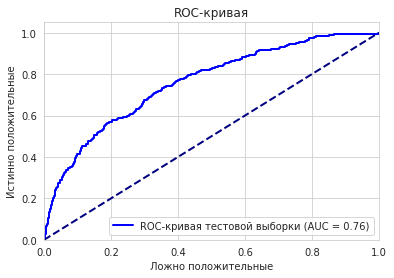

AUC для тестовой выборки: 0.7578163489013696


In [50]:
# Отображение ROC-кривой
display_roc_curves(best_model, X_val, y_val)

#### Общий вывод по модели Логистическая регрессия (Logistic Regression)

F1-мера на валидационных данных: 0.3099:

- Это довольно низкое значение, что указывает на плохое качество модели в смысле сочетания полноты и точности. Значение ниже 0.5 считается плохим.

Матрица ошибок:

- TN (Истинно отрицательные): 76.90%. Это означает, что большинство из тех, кого модель классифицировала как отрицательные, действительно таковыми являются;

- FP (Ложноположительные): 2.70%. Это процент неверно классифицированных положительных случаев;

- FN (Ложноотрицательные): 15.80%. Это довольно высокий процент — это те, кто на самом деле являются положительными, но были классифицированы как отрицательные;

- TP (Истинноположительные): 4.60%. То есть из всех положительных примеров модель правильно определила только 4.60%.

Кривые обучения:

- Точность на тренировочной выборке уменьшается при увеличении размера выборки, что может указывать на то, что модель начинает обобщать, а не запоминать данные;

- Точность на кросс-валидационной выборке в основном стабильна на протяжении всего объема данных, что хорошо;

- Разница между точностью на тренировочной и кросс-валидационной выборке довольно мала, что указывает на отсутствие явного переобучения.

AUC: 0.75.

- Значение AUC лежит в диапазоне от 0 до 1, и значение 0.75 довольно неплохое. Это говорит о том, что модель имеет неплохое качество разделения классов, хотя есть и значительное пространство для улучшений.

Выводы:

Модель имеет проблемы с балансом между точностью и полнотой. Это связано с дисбалансом классов в наших данных.

Модель хорошо справляется с определением отрицательных примеров, но испытывает трудности с правильной классификацией положительных примеров.

На основе кривых обучения можно сказать, что модель не страдает от переобучения.

#### --------------------------------------------------------------------------------------------------------------------------------

<a id="Decision_Trees"></a>

#### Решающие деревья (Decision Trees)

In [53]:
def Decision_Tree_Classifier(X_train, y_train, sampling=None):
    # Определение модели Решающих деревьев
    tree_model = DecisionTreeClassifier(random_state = random_state)

    """
    criterion : критерий для разбиения (индекс Джини или энтропия)
    'gini': Индекс Джини измеряет неопределенность (чистоту) в узле. Чем меньше значение индекса Джини, тем "чище" узел.
    'entropy': Энтропия измеряет степень хаоса или неопределенности в узле. Чем меньше значение энтропии, тем "чище" узел.
    """

    # Определение сетки гиперпараметров для Решающих деревьев
    param_grid_tree = {
        'model__criterion': ['gini', 'entropy'],           # критерий для разбиения (индекс Джини или энтропия)
        'model__splitter': ['best', 'random'],             # стратегия выбора разбиения
        'model__max_depth': [None, 10, 20, 30, 50],        # максимальная глубина дерева
        'model__min_samples_split': [2, 5, 10],            # минимальное число примеров для разбиения узла
        'model__min_samples_leaf': [1, 2, 4],              # минимальное число примеров в листе
    }

     # Создание пайплайна с масштабированием и моделью
    if sampling == 'SMOTE':
        pipeline = Pipeline([
            ('scaler', StandardScaler()),                # Масштабирование данных
            ('sampling', SMOTE(random_state=0)),         # Апсемплинг только на обучающих данных
            ('model', tree_model)                        # Модель логистической регрессии
        ])
    elif sampling == 'ADASYN':
        pipeline = Pipeline([
            ('scaler', StandardScaler()),                # Масштабирование данных
            ('sampling', ADASYN(random_state=0)),        # Апсемплинг только на обучающих данных
            ('model', tree_model)                        # Модель логистической регрессии
        ])
    else:
        pipeline = Pipeline([
            ('scaler', StandardScaler()),                # Масштабирование данных
            ('model', tree_model)                        # Модель логистической регрессии
        ])

    # Создание экземпляра GridSearchCV для Решающих деревьев
    grid_search_tree = GridSearchCV(pipeline, param_grid_tree, cv=10, scoring='f1', refit=True, n_jobs=-1)

    # Обучение на обучающей выборке с перебором всех комбинаций гиперпараметров
    grid_search_tree.fit(X_train, y_train)

    # Получение лучшей модели Решающих деревьев с оптимальными гиперпараметрами
    best_tree_model = grid_search_tree.best_estimator_

    # Лучшая оценка (метрика accuracy) на валидационных данных
    best_f1 = grid_search_tree.best_score_
    print("Лучшая оценка на валидационных данных (F1-мера):", best_f1)

    return best_tree_model

In [54]:
best_tree_model = Decision_Tree_Classifier(X_train, y_train)

Лучшая оценка на валидационных данных (F1-мера): 0.5649647140854898


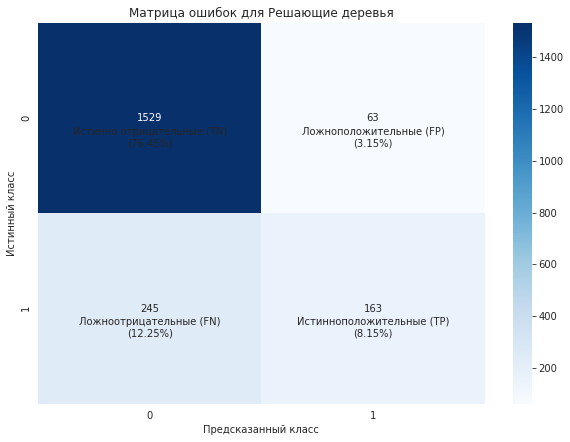

Истинно отрицательные (TN): 1529 (76.45%)
Ложноположительные    (FP): 63 (3.15%)
Ложноотрицательные    (FN): 245 (12.25%)
Истинноположительные  (TP): 163 (8.15%)


In [55]:
# Получение предсказаний модели на тестовой выборке
y_test_pred = best_tree_model.predict(X_val)

# Вызов функции для визуализации матрицы ошибок на тестовой выборке
display_confusion_matrix(y_val, y_test_pred, "Решающие деревья")

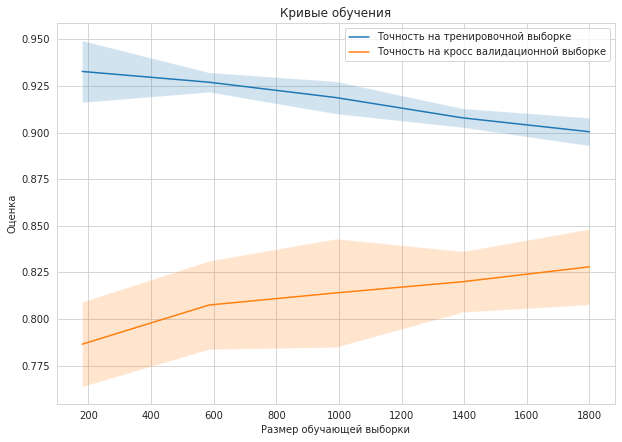

Точность на тренировочной выборке:
Размер выборки: 180, Точность: 0.93 +/- 0.02
Размер выборки: 585, Точность: 0.93 +/- 0.01
Размер выборки: 990, Точность: 0.92 +/- 0.01
Размер выборки: 1395, Точность: 0.91 +/- 0.01
Размер выборки: 1800, Точность: 0.90 +/- 0.01

Точность на кросс-валидационной выборке:
Размер выборки: 180, Точность: 0.79 +/- 0.02
Размер выборки: 585, Точность: 0.81 +/- 0.02
Размер выборки: 990, Точность: 0.81 +/- 0.03
Размер выборки: 1395, Точность: 0.82 +/- 0.02
Размер выборки: 1800, Точность: 0.83 +/- 0.02


In [56]:
# Отображение кривых обучения
display_learning_curves(best_tree_model, X_test, y_test, cv=10)

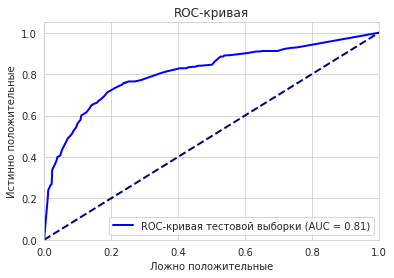

AUC для тестовой выборки: 0.8103153635826189


In [57]:
# Отображение ROC-кривой
display_roc_curves(best_tree_model, X_val, y_val)

#### Общий вывод по модели Решающие деревья (Decision Trees)

F1-мера: 

- Значение F1-меры для модели составляет приблизительно 0.56. Наш результат ниже 0.7, что указывает на то, что модель имеет проблемы с балансом между точностью и полнотой.

Матрица ошибок (confusion matrix):

- TN (Истинно отрицательные): 75.40%. Это хороший показатель, который говорит о том, что модель эффективно идентифицирует отрицательные примеры;

- FP (Ложноположительные): 4.20%. Это указывает на то, что модель иногда ошибочно классифицирует отрицательные примеры как положительные;

- FN (Ложноотрицательные): 10.70%. Это означает, что модель иногда пропускает истинные положительные примеры;

- TP (Истинноположительные): 9.70%. Это говорит о том, как часто модель правильно идентифицирует положительные примеры.

Кривые обучения:

- Точность на тренировочной выборке держится около 0.9 и не изменяется сильно при увеличении объема данных. Это может указывать на то, что модель не переобучается;

- Точность на кросс-валидационной выборке увеличивается незначительно с увеличением размера выборки. Это хороший признак, так как это может указывать на стабильность модели на разных подмножествах данных.

AUC: 

- AUC составляет 0.80. Это довольно хороший показатель, который говорит о том, что модель эффективно различает положительные и отрицательные классы.

Вывод:

Модель показывает приемлемую способность различать между положительными и отрицательными классами, основываясь на показателе AUC, равном 0.80. Это означает, что в целом модель достаточно чувствительна и способна разделять классы.

Однако F1-мера, равная приблизительно 0.55, говорит о том, что есть потенциал для улучшения, особенно баланс между точностью и полнотой.

Матрица ошибок показывает, что модель эффективно идентифицирует отрицательные примеры (TN = 75.40%), но у неё есть сложности с правильной классификацией положительных примеров, с FN равным 10.70%.

Кривые обучения указывают на стабильную производительность модели на тренировочной выборке, а также на улучшение производительности на кросс-валидационной выборке с увеличением размера выборки. Это говорит о том, что модель не переобучается и может демонстрировать неплохую обобщающую способность.

#### --------------------------------------------------------------------------------------------------------------------------------

<a id="Random_Forest"></a>

#### Случайный лес (Random Forest)

In [58]:
def Random_Forest_Classifier(X_train, y_train, sampling=None):
    # Определение модели Случайного леса
    rf_model = RandomForestClassifier(random_state = random_state)

    """
    n_estimators: Количество деревьев в лесу. 
    Большее значение может улучшить точность, но увеличит время обучения.
    """

    # Определение сетки гиперпараметров для Случайного леса
    param_grid_rf = {
        'model__n_estimators': [10, 25, 50],            # количество деревьев в лесу
        'model__criterion': ['gini', 'entropy'],        # критерий для разбиения (индекс Джини или энтропия)
        'model__max_depth': [None, 10, 20, 30, 50],     # максимальная глубина дерева
        'model__min_samples_split': [2, 5, 10],         # минимальное число примеров для разбиения узла
        'model__min_samples_leaf': [1, 2, 4],           # минимальное число примеров в листе
    }

    # Создание пайплайна с масштабированием и моделью
    if sampling == 'SMOTE':
        pipeline = Pipeline([
            ('scaler', StandardScaler()),                # Масштабирование данных
            ('sampling', SMOTE(random_state=0)),         # Апсемплинг только на обучающих данных
            ('model', rf_model)                          # Модель логистической регрессии
        ])
    elif sampling == 'ADASYN':
        pipeline = Pipeline([
            ('scaler', StandardScaler()),                # Масштабирование данных
            ('sampling', ADASYN(random_state=0)),        # Апсемплинг только на обучающих данных
            ('model', rf_model)                          # Модель логистической регрессии
        ])
    else:
        pipeline = Pipeline([
            ('scaler', StandardScaler()),                # Масштабирование данных
            ('model', rf_model)                          # Модель логистической регрессии
        ])

    # Создание экземпляра GridSearchCV для Случайного леса
    grid_search_rf = GridSearchCV(pipeline, param_grid_rf, cv=10, scoring='f1', refit=True, n_jobs=-1)

    # Обучение на обучающей выборке с перебором всех комбинаций гиперпараметров
    grid_search_rf.fit(X_train, y_train)

    # Получение лучшей модели Случайного леса с оптимальными гиперпараметрами
    best_f1 = grid_search_rf.best_estimator_

    # Лучшая оценка (метрика accuracy) на валидационных данных
    best_accuracy = grid_search_rf.best_score_
    print("Лучшая оценка на валидационных данных (F1-мера):", best_f1)

    return best_rf_model

In [59]:
best_rf_model = Random_Forest_Classifier(X_train, y_train)

Лучшая оценка на валидационных данных (F1-мера): 0.5825190221744664


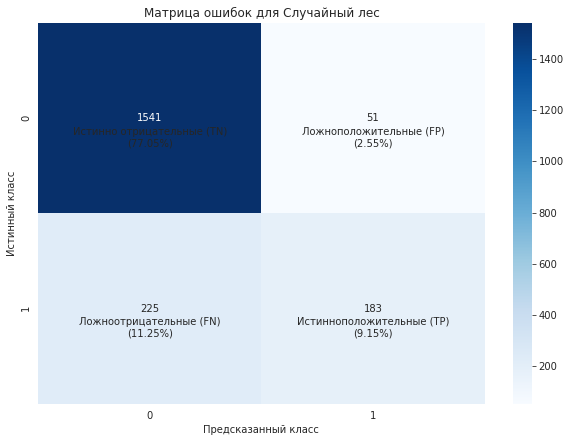

Истинно отрицательные (TN): 1541 (77.05%)
Ложноположительные    (FP): 51 (2.55%)
Ложноотрицательные    (FN): 225 (11.25%)
Истинноположительные  (TP): 183 (9.15%)


In [60]:
# Получение предсказаний для тестового набора данных
y_pred = best_rf_model.predict(X_val)

# Вывод матрицы ошибок
display_confusion_matrix(y_val, y_pred, 'Случайный лес')

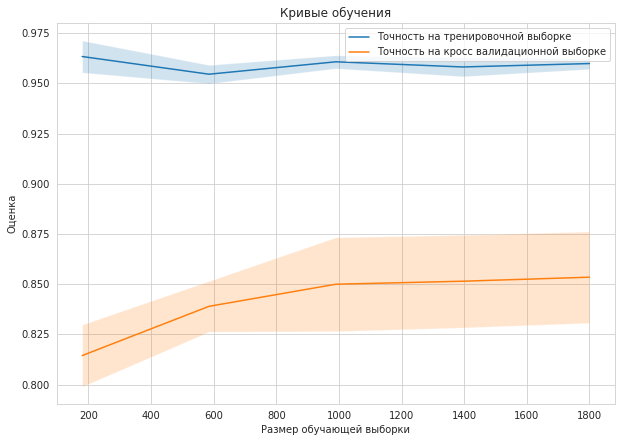

Точность на тренировочной выборке:
Размер выборки: 180, Точность: 0.96 +/- 0.01
Размер выборки: 585, Точность: 0.95 +/- 0.00
Размер выборки: 990, Точность: 0.96 +/- 0.00
Размер выборки: 1395, Точность: 0.96 +/- 0.00
Размер выборки: 1800, Точность: 0.96 +/- 0.00

Точность на кросс-валидационной выборке:
Размер выборки: 180, Точность: 0.81 +/- 0.02
Размер выборки: 585, Точность: 0.84 +/- 0.01
Размер выборки: 990, Точность: 0.85 +/- 0.02
Размер выборки: 1395, Точность: 0.85 +/- 0.02
Размер выборки: 1800, Точность: 0.85 +/- 0.02


In [61]:
# Отображение кривых обучения
display_learning_curves(best_rf_model, X_test, y_test, cv=10)

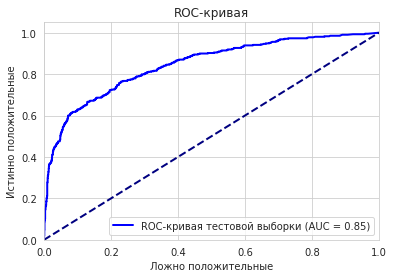

AUC для тестовой выборки: 0.8453788550596119


In [62]:
# Отображение ROC-кривой
display_roc_curves(best_rf_model, X_val, y_val)

#### Общий вывод для модели Случайный лес (Random Forest)

F1-мера: 

- Значение F1-меры для модели составляет приблизительно 0.58. Наш результат ниже 0.7, что указывает на то, что модель имеет проблемы с балансом между точностью и полнотой.

Матрица ошибок:

- Истинно отрицательные (TN): 77.05% - довольно высокий процент правильно классифицированных отрицательных примеров;

- Ложноположительные (FP): 2.55% - доля примеров, которые были неверно классифицированы как положительные;

- Ложноотрицательные (FN): 11.30% - довольно высокий процент положительных примеров, которые были неверно классифицированы как отрицательные;

- Истинноположительные (TP): 9.10% - доля правильно классифицированных положительных примеров.

Есть проблема с ложноотрицательными классификациями, которая ухудшает полноту.


Кривые обучения:

- Точность на тренировочной выборке стабильна и остается высокой (около 0.92) независимо от размера выборки;

- Точность на кросс-валидационной выборке стабильна около 0.85 и не достигает точности на тренировочной выборке. Это может указывать на некоторое переобучение модели, так как модель показывает лучшие результаты на тренировочных данных, чем на новых данных (кросс-валидационных).

AUC:

Значение 0.84 говорит о том, что модель имеет хорошее качество разделения между положительным и отрицательным классами.

Вывод:

Модель, основанная на алгоритме RandomForestClassifier, показывает приемлемую производительность с AUC, равным 0.84, что свидетельствует о хорошей способности различать классы. 

Однако F1-мера на валидационной выборке составляет только 0.58, что указывает на проблемы с балансом между точностью и полнотой, особенно учитывая высокий процент ложноотрицательных классификаций (11.30%). 

Точность на тренировочной выборке стабильно выше, чем на кросс-валидационной, что может указывать на некоторый недостаток обобщающей способности, хотя и нет явных признаков переобучения.

#### --------------------------------------------------------------------------------------------------------------------------------

<a id="Gradient_Boosting"></a>

#### Градиентный бустинг (Gradient Boosting)

In [63]:
def Gradient_Boosting_Classifier(X_train, y_train, sampling=None):  
    # Создание экземпляра модели градиентного бустинга
    model_gb = GradientBoostingClassifier(random_state = random_state)

    # Определение сетки гиперпараметров, которую нужно исследовать для градиентного бустинга
    param_grid_gb = {
        'model__learning_rate': [0.01, 0.1, 0.5],        # Скорость обучения (шаг градиентного спуска)
        'model__n_estimators': [50, 100, 200],           # Количество базовых моделей (деревьев)
        'model__max_depth': [3, 5, 7],                   # Максимальная глубина деревьев
    }

    # Создание пайплайна с масштабированием и моделью
    if sampling == 'SMOTE':
        pipeline = Pipeline([
            ('scaler', StandardScaler()),                # Масштабирование данных
            ('sampling', SMOTE(random_state=0)),         # Апсемплинг только на обучающих данных
            ('model', model_gb)                          # Модель логистической регрессии
        ])
    elif sampling == 'ADASYN':
        pipeline = Pipeline([
            ('scaler', StandardScaler()),                # Масштабирование данных
            ('sampling', ADASYN(random_state=0)),        # Апсемплинг только на обучающих данных
            ('model', model_gb)                          # Модель логистической регрессии
        ])
    else:
        pipeline = Pipeline([
            ('scaler', StandardScaler()),                # Масштабирование данных
            ('model', model_gb)                          # Модель логистической регрессии
        ])

    # Создание экземпляра GridSearchCV с 10 фолдами кросс-валидации и оптимизацией по accuracy
    grid_search_gb = GridSearchCV(pipeline, param_grid_gb, cv=10, scoring='f1', refit=True, n_jobs=-1)

    # Обучение на обучающей выборке с перебором всех комбинаций гиперпараметров
    grid_search_gb.fit(X_train, y_train)

    # Получение лучшей модели с оптимальными гиперпараметрами
    best_model_gb = grid_search_gb.best_estimator_

    # Лучшая оценка (метрика accuracy) на валидационных данных
    best_f1 = grid_search_gb.best_score_
    print("Лучшая оценка на валидационных данных (F1-мера):", best_f1)

    return best_model_gb

In [64]:
best_model_gb = Gradient_Boosting_Classifier(X_train, y_train)

Лучшая оценка на валидационных данных (F1-мера): 0.591289959647139


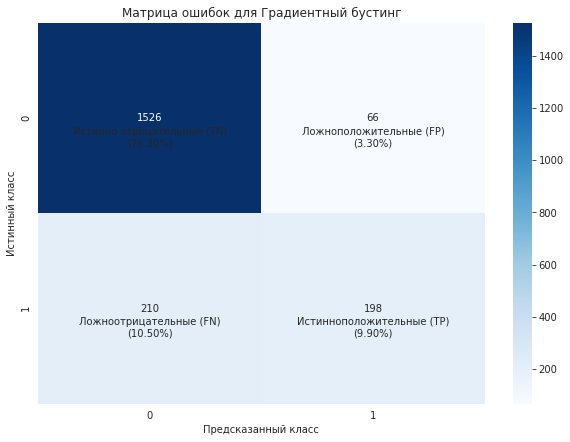

Истинно отрицательные (TN): 1526 (76.30%)
Ложноположительные    (FP): 66 (3.30%)
Ложноотрицательные    (FN): 210 (10.50%)
Истинноположительные  (TP): 198 (9.90%)


In [65]:
# Получение предсказаний для тестового набора данных
y_predict = best_model_gb.predict(X_val)

# Вывод матрицы ошибок
display_confusion_matrix(y_val, y_predict, 'Градиентный бустинг')

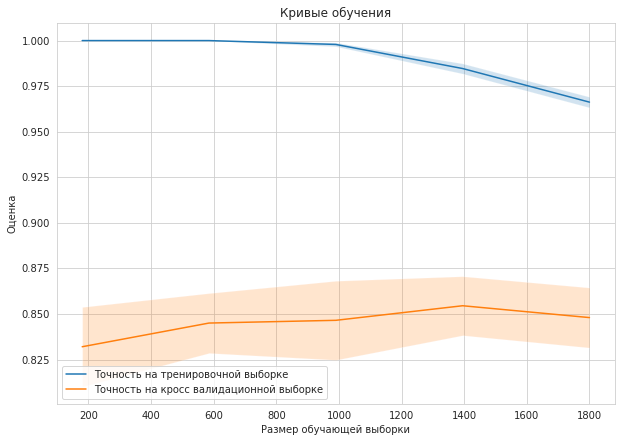

Точность на тренировочной выборке:
Размер выборки: 180, Точность: 1.00 +/- 0.00
Размер выборки: 585, Точность: 1.00 +/- 0.00
Размер выборки: 990, Точность: 1.00 +/- 0.00
Размер выборки: 1395, Точность: 0.98 +/- 0.00
Размер выборки: 1800, Точность: 0.97 +/- 0.00

Точность на кросс-валидационной выборке:
Размер выборки: 180, Точность: 0.83 +/- 0.02
Размер выборки: 585, Точность: 0.84 +/- 0.02
Размер выборки: 990, Точность: 0.85 +/- 0.02
Размер выборки: 1395, Точность: 0.85 +/- 0.02
Размер выборки: 1800, Точность: 0.85 +/- 0.02


In [66]:
# Отображение кривых обучения
display_learning_curves(best_model_gb, X_test, y_test, cv=10)

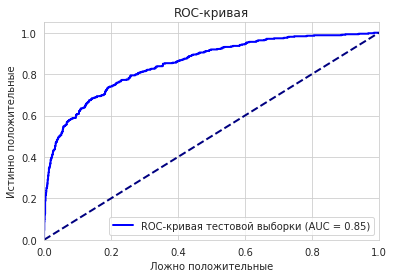

AUC для тестовой выборки: 0.8522322088383092


In [67]:
# Отображение ROC-кривой
display_roc_curves(best_model_gb, X_val, y_val)

#### Общий вывод для модели Градиентный бустинг (Gradient Boosting)

Метрика F1-мера:

- F1-мера в 0.589 говорит о том, что модель имеет умеренное качество, но есть место для улучшений.

Матрица ошибок (Confusion Matrix):

- TN (Истинно отрицательные): 76.80% прогнозов правильно классифицировали отрицательные образцы;

- FP (Ложноположительные): 2.80% были ошибочно классифицированы как положительные;

- FN (Ложноотрицательные): 11.00% были ошибочно классифицированы как отрицательные;

- TP (Истинноположительные): 9.40% правильно классифицированы как положительные.

Основываясь на этих данных, модель имеет более высокий процент FN, чем FP. Это может указывать на проблему с полнотой модели.

Кривые обучения:

- На тренировочной выборке точность начинается с 1.0 при меньшем объеме данных и уменьшается до 0.90 по мере увеличения объема данных. Это нормальное явление;

- На кросс-валидационной выборке точность начинается с 0.83 и увеличивается до 0.86. Это хороший признак, что модель становится лучше с увеличением объема данных;

- Наблюдается разрыв между точностью на тренировочной и кросс-валидационной выборках, что может указывать на переобучение.

AUC:

- Значение AUC 0.85 говорит о том, что модель имеет качество разделения классов, но, опять же, есть потенциал для улучшения.

Вывод:

Модель, обученная на основе алгоритма RandomForestClassifier, демонстрирует умеренное качество предсказания, с F1-мерой равной 0.589 и AUC 0.8534. 

Присутствует потенциал переобучения, основываясь на данных кривых обучения, а также проблемы с полнотой, учитывая высокий процент ложноотрицательных классификаций. 

В целом, модель требует дополнительной оптимизации для повышения её эффективности.

#### --------------------------------------------------------------------------------------------------------------------------------

<a id="3.1"></a>

#### Балансировки классов

Несбалансированные датасеты - это частая проблема в задачах машинного обучения. Когда один из классов представлен в небольшом количестве по сравнению с другими, это может привести к неправильному или смещенному обучению модели.

[Вернуться к задачам исследования](#Задачи_исследования)

<a id="3.2"></a>

#### SMOTE (Synthetic Minority Over-sampling Technique)

SMOTE создает синтетические примеры минорного класса, интерполируя между существующими примерами.

Формула:

Для каждого примера минорного класса:

- Выберите k ближайших соседей из минорного класса;

- Выберите одного из k соседей и найдите разницу между текущим примером и этим соседом;

- Умножьте эту разницу на случайное число в диапазоне [0, 1];

- Добавьте полученное значение к текущему примеру, чтобы создать новый синтетический пример.

[Вернуться к задачам исследования](#Задачи_исследования)

In [68]:
def evaluate_model(model, X_val, y_val):
    """
    Оценивает модель на основе заданных валидационных данных и выводит различные метрики классификации.

    Параметры:
    ----------
    model : sklearn estimator
        Обученная модель для классификации, которая должна иметь методы predict и predict_proba.

    X_test : pandas DataFrame или numpy array, shape (n_samples, n_features)
        Тестовый набор данных, состоящий из признаков.

    y_test : pandas Series или numpy array, shape (n_samples,)
        Истинные метки классов для тестового набора данных.

    Вывод:
    -------
    None
        Функция выводит метрики классификации: accuracy, F1-score, ROC-AUC.
    """

    # Предсказание значений
    y_pred = model.predict(X_val)
    
    # Вероятности классов
    y_prob = model.predict_proba(X_val)[:, 1]
    
    # Расчет метрик
    accuracy = accuracy_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_prob)
    
    # Вывод результатов
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")


#### --------------------------------------------------------------------------------------------------------------------------------

Сначало посмотрим на метрики всех моделей, а потом виберем лучщую

<a id="Logistic_Regression_SMOTE"></a>

#### Логистическая регрессия (Logistic Regression) SMOTE

[Вернуться к задачам исследования](#Задачи_исследования)

In [72]:
# Обучаем модель
best_model_SMOTE = Logistic_Regression(X_train, y_train, 'SMOTE')

# Смотрим метрики
evaluate_model(best_model_SMOTE, X_val, y_val)

Лучшая оценка на валидационных данных (F1-мера): 0.49443073475313176
Accuracy: 0.6885
ROC-AUC: 0.7613


#### --------------------------------------------------------------------------------------------------------------------------------

<a id="Decision_Trees_SMOTE"></a>

#### Решающие деревья (Decision Trees) SMOTE

[Вернуться к задачам исследования](#Задачи_исследования)

In [73]:
# Обучаем модель
best_tree_model_SMOTE = Decision_Tree_Classifier(X_train, y_train, 'SMOTE')

# Смотрим метрики
evaluate_model(best_tree_model_SMOTE, X_val, y_val)

Лучшая оценка на валидационных данных (F1-мера): 0.5733566487502639
Accuracy: 0.8090
ROC-AUC: 0.8100


#### --------------------------------------------------------------------------------------------------------------------------------

<a id="Random_Forest_SMOTE"></a>

#### Случайный лес (Random Forest) SMOTE

[Вернуться к задачам исследования](#Задачи_исследования)

In [74]:
# Обучаем модель
best_rf_model_SMOTE = Random_Forest_Classifier(X_train, y_train, 'SMOTE')

# Смотрим метрики
evaluate_model(best_rf_model_SMOTE, X_val, y_val)

Лучшая оценка на валидационных данных (F1-мера): 0.6152639740837108
Accuracy: 0.8275
ROC-AUC: 0.8427


#### --------------------------------------------------------------------------------------------------------------------------------

<a id="Gradient_Boosting_SMOTE"></a>

#### Градиентный бустинг (Gradient Boosting) SMOTE

[Вернуться к задачам исследования](#Задачи_исследования)

In [75]:
# Обучаем модель
best_model_gb_SMOTE = Gradient_Boosting_Classifier(X_train, y_train, 'SMOTE')

# Смотрим метрики
evaluate_model(best_model_gb_SMOTE, X_val, y_val)

Лучшая оценка на валидационных данных (F1-мера): 0.6239290116387334
Accuracy: 0.8320
ROC-AUC: 0.8487


Лучшая модель среди SMOTE

#### --------------------------------------------------------------------------------------------------------------------------------

<a id="3.3"></a>

#### ADASYN (Adaptive Synthetic Sampling)

Этот метод похож на SMOTE, но с учетом плотности распределения. ADASYN создает больше синтетических примеров в тех областях, где плотность минорного класса ниже.

[Вернуться к задачам исследования](#Задачи_исследования)

<a id="Logistic_Regression_ADASYN"></a>

#### Логистическая регрессия (Logistic Regression) ADASYN

[Вернуться к задачам исследования](#Задачи_исследования)

In [76]:
# Обучаем модель
best_model_ADASYN = Logistic_Regression(X_train, y_train, 'ADASYN')

# Смотрим метрики
evaluate_model(best_model_ADASYN, X_val, y_val)

Лучшая оценка на валидационных данных (F1-мера): 0.4809944265386951
Accuracy: 0.6645
ROC-AUC: 0.7593


#### --------------------------------------------------------------------------------------------------------------------------------

<a id="Decision_Trees_ADASYN"></a>

#### Решающие деревья (Decision Trees) ADASYN

[Вернуться к задачам исследования](#Задачи_исследования)

In [77]:
# Обучаем модель
best_tree_model_ADASYN = Decision_Tree_Classifier(X_train, y_train, 'ADASYN')

# Смотрим метрики
evaluate_model(best_tree_model_ADASYN, X_val, y_val)

Лучшая оценка на валидационных данных (F1-мера): 0.565419452424909
Accuracy: 0.7650
ROC-AUC: 0.8038


#### --------------------------------------------------------------------------------------------------------------------------------

<a id="Random_Forest_ADASYN"></a>

#### Случайный лес (Random Forest) ADASYN

[Вернуться к задачам исследования](#Задачи_исследования)

In [78]:
# Обучаем модель
best_rf_model_ADASYN = Random_Forest_Classifier(X_train, y_train, 'ADASYN')

# Смотрим метрики
evaluate_model(best_rf_model_ADASYN, X_val, y_val)

Лучшая оценка на валидационных данных (F1-мера): 0.6112365108678979
Accuracy: 0.8250
ROC-AUC: 0.8479


#### --------------------------------------------------------------------------------------------------------------------------------

<a id="Gradient_Boosting_ADASYN"></a>

#### Градиентный бустинг (Gradient Boosting) ADASYN

[Вернуться к задачам исследования](#Задачи_исследования)

In [79]:
# Обучаем модель
best_model_gb_ADASYN = Gradient_Boosting_Classifier(X_train, y_train, 'ADASYN')

# Смотрим метрики
evaluate_model(best_model_gb_ADASYN, X_val, y_val)

Лучшая оценка на валидационных данных (F1-мера): 0.6202716531935935
Accuracy: 0.8480
ROC-AUC: 0.8549


Лучшая модель среди ADASYN и SMOTE

#### --------------------------------------------------------------------------------------------------------------------------------

<a id="Этап_4"></a>

#### Этап 4. Проверим качество модели на тестовой выборке и проверим модель на вменяемость

[Вернуться к задачам исследования](#Задачи_исследования)

Исходя из проведенных эксперементов наилучшая модель стала GB. Проверим модель на вменяемость используя Dummy Models.

- "Dummy Models", или "базовые модели", это простые модели, которые используются в машинном обучении как отправная точка или бейзлайн для сравнения с более сложными моделями;

Они представляют собой наиболее примитивные или наивные модели, которые обычно не используют никакой информации о данных для предсказания. Примеры таких моделей могут включать:

- DummyRegressor: Эта модель всегда предсказывает среднее значение целевой переменной из обучающего набора данных. Вне зависимости от входных данных, она всегда будет предсказывать одно и то же среднее значение;

- DummyClassifier: Этот классификатор предсказывает класс на основе простых правил. Самый простой пример - это модель, которая всегда предсказывает наиболее часто встречающийся класс в обучающем наборе данных.

Использование базовых моделей важно для оценки эффективности более сложных моделей машинного обучения. Если сложная модель не может превзойти базовую модель, это может указывать на проблему, такую как неправильная предобработка данных, некорректный выбор признаков или неэффективный алгоритм обучения.

In [ ]:
# Создание и обучение dummy модели
dummy_model = DummyClassifier(strategy='most_frequent')
dummy_model.fit(X_train, y_train)

# Получение предсказаний для тестового набора данных
dummy_y_pred = dummy_model.predict(X_test)

# Сравнение точности моделей
rf_accuracy = f1_score(y_test, best_model_gb_ADASYN.predict(X_test))
rf_accuracy = round(rf_accuracy, 2)

dummy_accuracy = f1_score(y_test, dummy_y_pred)
dummy_accuracy = round(dummy_accuracy, 2)

print(f"F1 score of Gradient Boosting: {rf_accuracy}")
print(f"F1 score of Dummy model: {dummy_accuracy}")

# Смотрим метрики для тестовых данных
evaluate_model(best_rf_model_ADASYN, X_test, y_test)


#### Вывод

Наша модель случайного леса существенно превосходит простой подход предсказания самого частого класса. Это указывает на то, что наша модель обучается и адекватно работает, поскольку она способна достигнуть более высокой точности, чем модель, которая просто всегда предсказывает самый частый класс. Так же модель достигла таргетной отмеки F1 меры >= 0.59.

#### --------------------------------------------------------------------------------------------------------------------------------

### Общий вывод

Все модели показали достаточно хорошие результаты после баланссировки классов, но "Случайный лес" показал наилучшие результаты. На данный момент модель "Случайный лес" выглядит как наиболее оптимальный выбор из-за высоких результатов по всем метрикам, включая целевую метрику F1 и стабильности результатов.